# 호우피해이력 전처리

In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
from datetime import datetime as dt
import numpy as np
import os

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [2]:
df = pd.read_excel('/content/호우피해이력정보/강남구.xls')
df.drop(columns=['번호'], inplace=True)
df.head()

,일자,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),태풍,강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,800139,962.0,19,없음,15,7.0,27.0,27.0,27.0,4.3,25.3
1,1998-08-01,711.8,800139,962.0,19,없음,24,21.5,35.5,62.5,62.5,5.2,25.2
2,1998-08-02,711.8,800139,962.0,19,없음,1,11.0,11.0,46.5,73.5,2.7,27.3
3,1998-08-03,711.8,800139,962.0,19,없음,24,24.5,51.0,62.0,97.5,4.2,26.3
4,1998-08-04,711.8,800139,962.0,19,없음,24,52.5,143.0,194.0,205.0,3.6,25.7


In [3]:
df.describe()

,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
count,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,148.037903,2.128274e+05,511.983871,11.451613,15.185484,15.943548,49.346774,93.588710,132.475806,4.087097,24.342742
std,272.925213,4.129671e+05,293.968549,6.901579,9.639322,18.981507,70.878207,100.972206,119.550851,1.391611,3.052899
min,0.900000,0.000000e+00,16.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,2.600000
25%,3.300000,0.000000e+00,272.500000,5.000000,4.750000,0.875000,1.000000,11.500000,31.875000,3.175000,22.875000
50%,6.500000,4.800000e+03,465.500000,13.000000,20.000000,7.000000,17.500000,50.750000,99.000000,3.900000,24.750000
75%,91.900000,3.121760e+05,819.000000,19.000000,24.000000,28.500000,71.375000,148.875000,201.375000,4.525000,26.225000
max,721.000000,1.820741e+06,962.000000,21.000000,24.000000,72.000000,350.500000,438.500000,514.000000,10.900000,30.200000


In [4]:
df.dtypes

,0
일자,object
"침수면적(1,000㎡)",float64
피해액(천원),int64
총강수량(mm),float64
기간(일),int64
태풍,object
강수계속시간(시간),int64
최다강수1H,float64
일강수량(mm),float64
누적 강수량(mm)-2일,float64


In [5]:
# 일자 전처리하기
df['일자'].isna().sum()

np.int64(0)

In [6]:
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

In [7]:
df['태풍'].unique()

array(['없음', '에위니아', '메아리'], dtype=object)

# 태풍 정보 처리하기
- 특정 사이트를 통해 크롤링하기
- OPEN-API 이용하기

### 크롤링
- 한글로 된 태풍명을 이용해서 풍속, 반경, 이동경로 등을 크롤링할 수 있는 사이트가 존재하지 않음.

- 기상청 기상자료개방포털 이용
  + https://data.kma.go.kr/data/typhoonData/typInfoTYList.do?pgmNo=689
  + 해당 사이트에서 selenium을 이용한 동적 크롤링을 이용하기에는 상세한 결과를 확인이 불가능.

### OPEN-API
- 기상청 기상자료개방포털 이용
  + 공공데이터포털: https://www.data.go.kr/data/15043570/fileData.do
  + 기상청 기상자료개방포털: https://data.kma.go.kr/data/typhoonData/typInfoTYList.do?pgmNo=689
  + 국가정보자원관리원 화재로 인한 것인지 해당 API 신청 및 이용 불가능

### 결과
- 태풍에 대한 정보는 일단 label 인코딩으로 진행

In [8]:
df['태풍'] = df['태풍'].apply(lambda x: 0 if x == '없음' else 1).astype(np.int64)

print(df['태풍'].value_counts())

태풍
0    122
1      2
Name: count, dtype: int64


In [9]:
df.dtypes

,0
일자,datetime64[ns]
"침수면적(1,000㎡)",float64
피해액(천원),int64
총강수량(mm),float64
기간(일),int64
태풍,int64
강수계속시간(시간),int64
최다강수1H,float64
일강수량(mm),float64
누적 강수량(mm)-2일,float64


In [10]:
df.head()

,일자,"침수면적(1,000㎡)",피해액(천원),총강수량(mm),기간(일),태풍,강수계속시간(시간),최다강수1H,일강수량(mm),누적 강수량(mm)-2일,누적 강수량(mm)-3일,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,800139,962.0,19,0,15,7.0,27.0,27.0,27.0,4.3,25.3
1,1998-08-01,711.8,800139,962.0,19,0,24,21.5,35.5,62.5,62.5,5.2,25.2
2,1998-08-02,711.8,800139,962.0,19,0,1,11.0,11.0,46.5,73.5,2.7,27.3
3,1998-08-03,711.8,800139,962.0,19,0,24,24.5,51.0,62.0,97.5,4.2,26.3
4,1998-08-04,711.8,800139,962.0,19,0,24,52.5,143.0,194.0,205.0,3.6,25.7


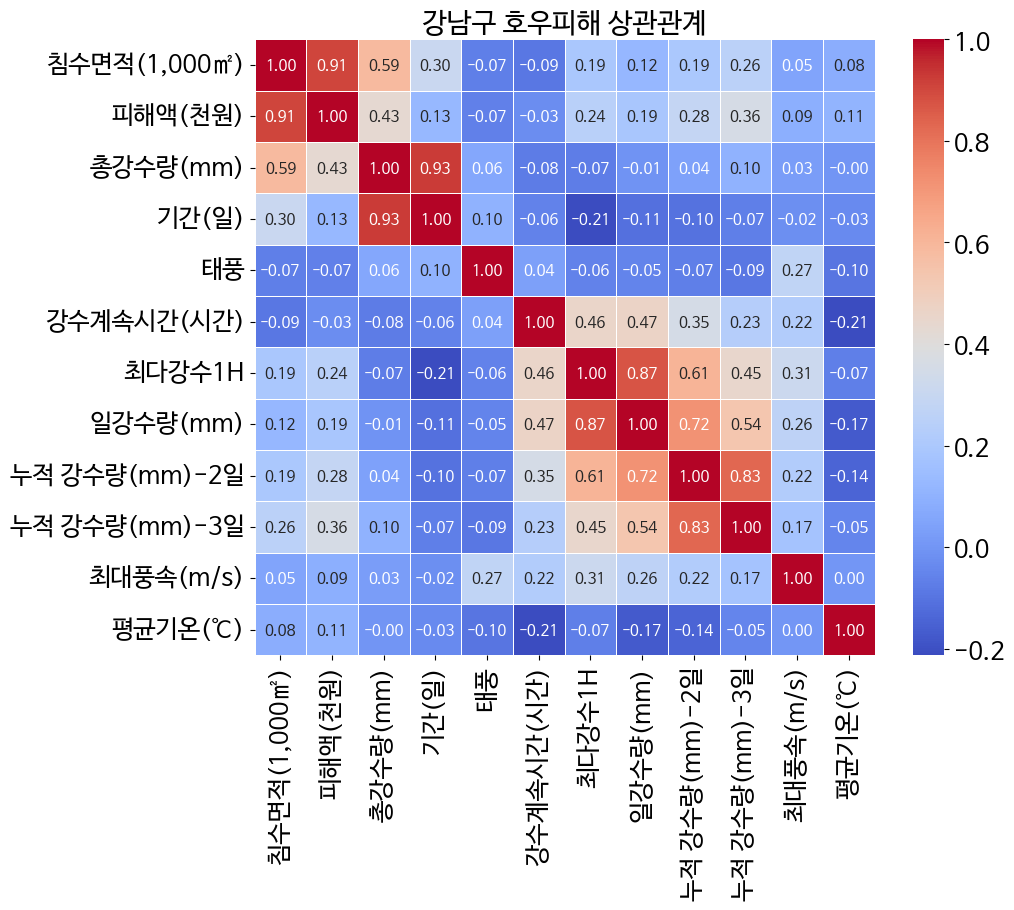

In [11]:
# 1. 상관계수 행렬 계산
correlation_matrix = df.corr(numeric_only=True)

# 3. 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    cbar=True,
    annot_kws={"fontsize": 11}
)

plt.title('강남구 호우피해 상관관계', fontsize=20)
plt.show()

# 상관관계 분석
- 호우와 관련하여 침수면적과 가장 큰 상관관계를 갖는 것은 총강수량(0.59)이다.
- 그 다음으로 큰 상관관계는 강우 기간(0.3)이다.
- 1시간 동안의 최다강수량 또한 0.19의 어느정도의 유의미한 상관관계를 갖는다.

## 기타 가설
- 누적강수량의 기간이 길수록 침수피해와 더 큰 상관관계를 갖는 것은 단기간만 내리는 강우는 침수피해를 주기 힘들기 때문이다.

## 이후 전처리
- 침수면적과 어느정도의 상관관계를 갖는 총강수량, 기간, 최다강수량(1H), 최대풍속, 평균기온을 제외한 모든 튜플을 drop한다.
  + 피해액은 침수의 피해를 직관적으로 나타내는 데이터가 아니기에 드롭한다.
  + 태풍이 음의 상관관계를 갖는 이유는 일부 침수피해가 태풍으로 인한 피해로 취급되어 침수피해로 계산되지 않는 것으로 예상되어 제외한다.
  + 일강수량 및 누적강수량은 총강수량이 있으므로 제외한다.
  + 강수계속시간(시간)의 경우에는 최댓값이 24이고, 그 다음날 값까지 고려하여 분석하기에는 무리가 있음으로 제외한다.

  ### 모든 데이터 합치고 pkl로 저장

In [12]:
df.drop(columns=['피해액(천원)', '태풍', '일강수량(mm)', '누적 강수량(mm)-2일', '누적 강수량(mm)-3일', '강수계속시간(시간)'], inplace=True)
df.head()

,일자,"침수면적(1,000㎡)",총강수량(mm),기간(일),최다강수1H,최대풍속(m/s),평균기온(℃)
0,1998-07-31,711.8,962.0,19,7.0,4.3,25.3
1,1998-08-01,711.8,962.0,19,21.5,5.2,25.2
2,1998-08-02,711.8,962.0,19,11.0,2.7,27.3
3,1998-08-03,711.8,962.0,19,24.5,4.2,26.3
4,1998-08-04,711.8,962.0,19,52.5,3.6,25.7


In [13]:
# 중간 날짜 구하는 함수
def get_middle_date(date_list):
    if len(date_list) == 1:
        return date_list[0]
    sorted_dates = sorted(date_list)
    mid_idx = len(sorted_dates) // 2
    return sorted_dates[mid_idx]

In [16]:
class Seolsi:
  def __init__(self, file_path):
    name, extension = os.path.splitext(os.path.basename(file_path))
    self.name = name
    self.df = pd.read_excel(file_path)

    # 불필요한 컬럼 제거
    self.df.drop(columns=['번호', '피해액(천원)', '태풍', '일강수량(mm)', '누적 강수량(mm)-2일', '누적 강수량(mm)-3일', '강수계속시간(시간)'], inplace=True)

    # '일자' 컬럼을 datetime 형식으로 변환
    self.df['일자'] = pd.to_datetime(self.df['일자'], format='%Y-%m-%d')

    # 고유한 침수 이벤트를 식별하기 위한 그룹 키 정의 ('일자' 제외)
    event_group_keys = ['침수면적(1,000㎡)', '총강수량(mm)', '기간(일)']

    # 기타 수치 컬럼에 대한 집계 방식 정의
    agg_dict = {
        '평균기온(℃)': 'mean',        # 평균
        '최다강수1H': 'max',        # 최댓값
        '최대풍속(m/s)': 'max',        # 최댓값
    }

    # ============================
    # 1) event_group_keys를 기준으로 수치형 특징 집계
    # ============================
    # '기간(일)'은 이미 event_group_keys에 포함되어 있으므로 agg_dict에 추가할 필요 없음.
    # 나머지 컬럼들은 모두 처리되므로, 컬럼을 순회하여 'first'를 추가하는 로직은 필요 없음.
    aggregated_features_df = self.df.groupby(event_group_keys).agg(agg_dict).reset_index()

    # ============================
    # 2) 중간 날짜를 계산하기 위해 '일자' 컬럼만 별도로 처리
    # ============================
    # event_group_keys를 기준으로 그룹화하고 모든 '일자'를 리스트로 수집
    date_processing_df = self.df.groupby(event_group_keys)['일자'].apply(list).reset_index()

    # 각 그룹의 '일자' 리스트에 대해 get_middle_date 함수 적용
    date_processing_df['일자'] = date_processing_df['일자'].apply(get_middle_date)

    # ============================
    # 3) 집계된 특징과 처리된 날짜를 병합
    # ============================
    self.df = pd.merge(aggregated_features_df, date_processing_df, on=event_group_keys)

    self.df['행정구역'] = self.name

  def __str__(self):
    return f"==={self.name}===\n{self.df.head()}\n========="

In [17]:
search_path = '/content/호우피해이력정보'
dfs = []

# 1. os.listdir()로 파일명/폴더명 리스트를 가져옵니다.
file_list = os.listdir(search_path)

# 2. 리스트를 for문으로 순회하며 전체 경로를 만듭니다.
for filename in file_list:
    # 전체 경로 생성 (디렉터리 경로 + 파일 이름)
    full_path = os.path.join(search_path, filename)

    # 3. 이것이 파일인지 확인하고 출력합니다.
    if not os.path.isfile(full_path):
        continue
    name, extension = os.path.splitext(filename)
    dfs.append(Seolsi(full_path))
    # print(full_path)

In [19]:
df_li = [d.df for d in dfs]

In [20]:
# ============================
#   모든 행정구역 df 합치기
# ============================
final_df = pd.concat(df_li, ignore_index=True)

print("합쳐진 DF 크기:", final_df.shape)
print(final_df.head())

합쳐진 DF 크기: (323, 8)
   침수면적(1,000㎡)  총강수량(mm)  기간(일)    평균기온(℃)  최다강수1H  최대풍속(m/s)         일자  \
0           0.4      75.0      3  24.833333    20.5        5.0 2012-07-18   
1           0.4     113.5      3  24.666667    51.5        4.2 2005-07-28   
2           0.4     274.5     10  22.940000    21.5        4.2 2011-07-12   
3           0.9     187.0      2  21.550000    46.0        4.1 2012-07-06   
4           0.9     195.5      4  23.700000    30.0        4.1 2003-07-24   

   행정구역  
0  서대문구  
1  서대문구  
2  서대문구  
3  서대문구  
4  서대문구  


In [23]:
final_df.dtypes

,0
"침수면적(1,000㎡)",float64
총강수량(mm),float64
기간(일),int64
평균기온(℃),float64
최다강수1H,float64
최대풍속(m/s),float64
일자,datetime64[ns]
행정구역,object


In [24]:
final_df['평균기온(℃)'] = final_df['평균기온(℃)'].astype(float).round(1)
final_df.head()

,"침수면적(1,000㎡)",총강수량(mm),기간(일),평균기온(℃),최다강수1H,최대풍속(m/s),일자,행정구역
0,0.4,75.0,3,24.8,20.5,5.0,2012-07-18,서대문구
1,0.4,113.5,3,24.7,51.5,4.2,2005-07-28,서대문구
2,0.4,274.5,10,22.9,21.5,4.2,2011-07-12,서대문구
3,0.9,187.0,2,21.6,46.0,4.1,2012-07-06,서대문구
4,0.9,195.5,4,23.7,30.0,4.1,2003-07-24,서대문구


# 전처리한 데이터 저장
- 타입까지 유지하며 저장하기 위해 pkl 형식의 파일로 저장

In [25]:
final_df.to_pickle('서울시.pkl')

In [26]:
final_df.to_csv("서울시.csv", index=False, encoding="utf-8-sig")